# TRAFFIC VOLUME PREDICTION

## Importing required libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn import preprocessing
sns.set()

### Loading Dataset

In [2]:
train = pd.read_csv('DataSets/Train.csv')
test = pd.read_csv('DataSets/Test.csv')

train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [3]:
test.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
date_time              33750 non-null object
is_holiday             33750 non-null object
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
weather_description    33750 non-null object
traffic_volume         33750 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 3.9+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 14 columns):
date_time              14454 non-null object
is_holiday             14454 non-null object
air_pollution_index    14454 non-null int64
humidity               14454 non-null int64
wind_speed             14454 non-null int64
wind_direction         14454 non-null int64
visibility_in_miles    14454 non-null int64
dew_point              14454 non-null int64
temperature            14454 non-null float64
rain_p_h               14454 non-null float64
snow_p_h               14454 non-null int64
clouds_all             14454 non-null int64
weather_type           14454 non-null object
weather_description    14454 non-null object
dtypes: float64(2), int64(8), object(4)
memory usage: 1.5+ MB


### MISSING VALUES

In [6]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)

# IMPUTER CAN BE USED TO MANAGE MISSING VALUES 
# GIVEN TRAIN AND TEST DATA DOESN'T CONTAIN ANY MISSING VALUES

### Deleting Duplicate entries

In [7]:
duplicateRowsDF = train[train.duplicated(['date_time'])]
train.drop_duplicates(subset ="date_time", keep = "first", inplace = True) 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28589 entries, 0 to 33748
Data columns (total 15 columns):
date_time              28589 non-null object
is_holiday             28589 non-null object
air_pollution_index    28589 non-null int64
humidity               28589 non-null int64
wind_speed             28589 non-null int64
wind_direction         28589 non-null int64
visibility_in_miles    28589 non-null int64
dew_point              28589 non-null int64
temperature            28589 non-null float64
rain_p_h               28589 non-null float64
snow_p_h               28589 non-null float64
clouds_all             28589 non-null int64
weather_type           28589 non-null object
weather_description    28589 non-null object
traffic_volume         28589 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 3.5+ MB


In [8]:
train.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [9]:
test.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
dtype: int64

### Visualization

In [10]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['wind_speed'], y = train['traffic_volume'])
# plt.ylabel('traffic_volume')
# plt.xlabel('speed')
# #ax.set_xlim([240,310])
# plt.show()

In [11]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['temperature'], y = train['traffic_volume'])
# plt.ylabel('traffic_volume')
# plt.xlabel('temperatre')
# #ax.set_xlim([240,310])
# plt.show()

In [12]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['humidity'], y = train['traffic_volume'])
# plt.ylabel('traffic_volume')
# plt.xlabel('humidity')
# plt.show()

In [13]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['rain_p_h'], y = train['traffic_volume'])
# plt.ylabel('traffic_volume')
# plt.xlabel('rain_p_h')
# ax.set_xlim([0,20])
# plt.show()

In [14]:
# fig, ax = plt.subplots()
# ax.scatter(x = train['date_time'], y = train['traffic_volume'])
# plt.ylabel('traffic_volume')
# plt.xlabel('date_time')
# ax.set_xlim([0,20])
# plt.show()

### Managing outliers

In [15]:
for index, row in train.iterrows():
    if(row['temperature']==0):
        train.drop(index,inplace=True)
    if(row['rain_p_h']>60):
        train.drop(index,inplace=True)
    if(row['snow_p_h']>0.2):
        train.drop(index,inplace=True)

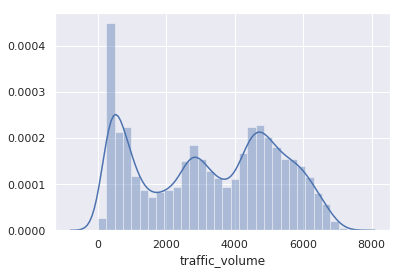

In [16]:
sns.distplot(train['traffic_volume'])

### Extracting date and time

In [17]:
from datetime import datetime
train['date_time'] = pd.to_datetime(train.date_time)
train['year'] = train['date_time'].dt.year
train['month'] = train['date_time'].dt.month
train['day'] = train['date_time'].dt.day
train['dayofyear'] = train['date_time'].dt.dayofyear
train['weekofyear'] = train['date_time'].dt.weekofyear
train['dayofweek'] = train['date_time'].dt.dayofweek
train['hour'] = train['date_time'].dt.hour
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,...,Clouds,scattered clouds,5545,2012,10,2,276,40,1,9
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,...,Clouds,broken clouds,4516,2012,10,2,276,40,1,10
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,...,Clouds,overcast clouds,4767,2012,10,2,276,40,1,11
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,...,Clouds,overcast clouds,5026,2012,10,2,276,40,1,12
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,...,Clouds,broken clouds,4918,2012,10,2,276,40,1,13


### Dropping unnecessary columns


In [18]:
train.drop(['air_pollution_index'], axis=1, inplace=True)
train.drop(['wind_direction'], axis=1, inplace=True)
train.drop(['dew_point'], axis=1, inplace=True)
train.head()

,date_time,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,2012-10-02 09:00:00,None,89,2,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,276,40,1,9
1,2012-10-02 10:00:00,None,67,3,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,276,40,1,10
2,2012-10-02 11:00:00,None,66,3,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,276,40,1,11
3,2012-10-02 12:00:00,None,66,3,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,276,40,1,12
4,2012-10-02 13:00:00,None,65,3,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,276,40,1,13


### Label encoding categorical features

In [19]:

labelencoder = LabelEncoder()
train['weather_description'] = labelencoder.fit_transform(train['weather_description'])

train.head()

,date_time,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,2012-10-02 09:00:00,None,89,2,1,288.28,0.0,0.0,40,Clouds,23,5545,2012,10,2,276,40,1,9
1,2012-10-02 10:00:00,None,67,3,1,289.36,0.0,0.0,75,Clouds,2,4516,2012,10,2,276,40,1,10
2,2012-10-02 11:00:00,None,66,3,2,289.58,0.0,0.0,90,Clouds,19,4767,2012,10,2,276,40,1,11
3,2012-10-02 12:00:00,None,66,3,5,290.13,0.0,0.0,90,Clouds,19,5026,2012,10,2,276,40,1,12
4,2012-10-02 13:00:00,None,65,3,7,291.14,0.0,0.0,75,Clouds,2,4918,2012,10,2,276,40,1,13


### Mapping holidays to proper dates

In [20]:
train['dates'] = [d.date() for d in train['date_time']]

date_of_holiday = train.dates[train.is_holiday!='None']
holiday_type = train.is_holiday[train.is_holiday!='None']
mapping = {i:j for i,j in zip(date_of_holiday,holiday_type)}
for x in mapping:
    train.loc[train.dates == x,'is_holiday'] = mapping[x]
    
train.drop(['dates'],axis=1,inplace=True)

In [21]:
train.drop(['date_time'], axis=1, inplace=True)
train.head()

,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,None,89,2,1,288.28,0.0,0.0,40,Clouds,23,5545,2012,10,2,276,40,1,9
1,None,67,3,1,289.36,0.0,0.0,75,Clouds,2,4516,2012,10,2,276,40,1,10
2,None,66,3,2,289.58,0.0,0.0,90,Clouds,19,4767,2012,10,2,276,40,1,11
3,None,66,3,5,290.13,0.0,0.0,90,Clouds,19,5026,2012,10,2,276,40,1,12
4,None,65,3,7,291.14,0.0,0.0,75,Clouds,2,4918,2012,10,2,276,40,1,13


In [22]:
train.describe()
train.to_csv("xyz.csv")

### Creation of is_weekend and peak_hr columns and assigning weights by refering graphs

In [23]:
for index, row in train.iterrows():

    if train.loc[index,'dayofweek']==6:
        train.at[index,'is_weekend']=2
    elif train.loc[index,'dayofweek']==5:
        train.at[index,'is_weekend']=3
    elif train.loc[index,'dayofweek']==4:
        train.at[index,'is_weekend']=6
    else:
        train.at[index,'is_weekend']=5

    if train.loc[index,'hour']>=22 and train.loc[index,'hour']<6:
        train.at[index,'peak_hr']=int(0)
    elif train.loc[index,'hour']>=19 and train.loc[index,'hour']<22:
        train.at[index,'peak_hr']=int(2)
    elif train.loc[index,'hour']>14 and train.loc[index,'hour']<19:
        train.at[index,'peak_hr']=int(9)
    elif train.loc[index,'hour']>=6 and train.loc[index,'hour']<=9:
        train.at[index,'peak_hr']=int(1)
    else:
         train.at[index,'peak_hr']=int(1.5)
            
            
            # ASSIGNED WEIGHTS (CUSTOM ENCODING)
 
    if train.loc[index,'is_holiday']=='None':
        train.loc[index,'is_holiday']=900
    elif train.loc[index,'is_holiday']=='Columbus Day' or train.loc[index,'is_holiday']=='Veterans Day' or train.loc[index,'is_holiday']=='Washingtons Birthday' or train.loc[index,'is_holiday']=='State Fair':
        train.loc[index,'is_holiday']=20
    elif train.loc[index,'is_holiday']=='Thanksgiving Day' or train.loc[index,'is_holiday']=='Christmas Day' or train.loc[index,'is_holiday']=='New Years Day' or train.loc[index,'is_holiday']=='Independence Day' or train.loc[index,'is_holiday']=='Labor Day':
        train.loc[index,'is_holiday']=15
    elif train.loc[index,'is_holiday']=='Memorial Day' or train.loc[index,'is_holiday']=='Martin Luther King Day':
        train.loc[index,'is_holiday']=10
    else :
        train.loc[index,'is_holiday']=15
        
        
    if train.loc[index,'weather_type']=='Clouds':
        train.loc[index,'weather_type']=40
    elif train.loc[index,'weather_type']=='Clear':
        train.loc[index,'weather_type']=30
    elif train.loc[index,'weather_type']=='Rain' or train.loc[index,'weather_type']=='Mist':
        train.loc[index,'weather_type']=12
    elif train.loc[index,'weather_type']=='Snow':
        train.loc[index,'weather_type']=7
    elif train.loc[index,'weather_type']=='Drizzle' or train.loc[index,'weather_type']=='Haze':
        train.loc[index,'weather_type']=5
    elif train.loc[index,'weather_type']=='Fog' or train.loc[index,'weather_type']=='Thunderstorm':
        train.loc[index,'weather_type']=3
    elif train.loc[index,'weather_type']=='Squall' or train.loc[index,'weather_type']=='Smoke':
        train.loc[index,'weather_type']=1
    else :
        train.loc[index,'weather_type']=10


### Corelation matrix

In [24]:
train.corr()

,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofyear,weekofyear,dayofweek,hour,is_weekend,peak_hr
is_holiday,1.000000,-0.007071,0.029844,-0.000511,0.017240,0.009590,0.004422,-0.027067,-0.006332,0.019652,0.063702,0.017270,-0.040638,0.004840,-0.040557,-0.056385,0.154860,0.002113,-0.090122,0.001494
humidity,-0.007071,1.000000,-0.146881,0.001559,0.044713,-0.000619,0.008933,0.004840,-0.033450,-0.011441,0.024034,-0.040810,0.158524,0.060835,0.163041,0.172878,-0.011644,0.003908,0.001614,0.012640
wind_speed,0.029844,-0.146881,1.000000,-0.007063,-0.068573,-0.014018,-0.004241,-0.003614,0.005444,0.067137,0.002045,0.087673,-0.097979,0.006348,-0.096661,-0.090332,-0.018748,0.005174,-0.000327,0.005736
visibility_in_miles,-0.000511,0.001559,-0.007063,1.000000,-0.007888,0.005954,0.003842,-0.001814,-0.002410,-0.007959,0.000381,-0.002184,-0.003929,-0.002904,-0.004104,-0.004428,0.003451,-0.000927,-0.003503,0.002093
temperature,0.017240,0.044713,-0.068573,-0.007888,1.000000,0.070588,-0.017878,-0.140459,0.029785,-0.080605,0.139579,0.095164,0.236936,0.016435,0.234312,0.242964,-0.002499,0.125790,-0.005281,0.127316
rain_p_h,0.009590,-0.000619,-0.014018,0.005954,0.070588,1.000000,-0.002643,0.070151,-0.135935,0.005791,-0.016228,-0.007836,0.012643,0.005837,0.012701,0.013411,-0.007514,-0.009315,-0.005009,-0.006337
snow_p_h,0.004422,0.008933,-0.004241,0.003842,-0.017878,-0.002643,1.000000,0.028238,-0.043248,0.002881,-0.006948,0.013855,0.003589,0.008853,0.004330,0.004519,-0.007073,-0.008575,0.013652,0.005401
clouds_all,-0.027067,0.004840,-0.003614,-0.001814,-0.140459,0.070151,0.028238,1.000000,-0.133409,-0.217716,0.044170,-0.090390,-0.036276,0.058417,-0.030984,-0.032762,-0.041325,0.020439,0.027504,0.031096
weather_type,-0.006332,-0.033450,0.005444,-0.002410,0.029785,-0.135935,-0.043248,-0.133409,1.000000,-0.039632,0.069060,-0.081476,-0.043219,-0.005360,-0.043557,-0.039479,0.020331,0.078513,-0.007052,0.063558
weather_description,0.019652,-0.011441,0.067137,-0.007959,-0.080605,0.005791,0.002881,-0.217716,-0.039632,1.000000,-0.056625,0.107780,-0.055385,-0.031668,-0.057916,-0.053361,0.027477,-0.016110,-0.027784,-0.016139


In [25]:
train.to_csv("prepros.csv")

In [26]:

y = train["traffic_volume"]

X = train.drop(["traffic_volume"],axis=1)


### Train Test splitting

In [27]:
from sklearn.model_selection import train_test_split 

x_train , x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)




# WE CHANGED THE test_size TO 0.00003 FOR TRAINING THE MODEL FOR THE WHOLE train.csv FILE BEFORE -
# -SUBMITTING THE PREDICTION

#### Scaling

In [28]:
scaler=StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

### Training the Random Forest Regressor :

In [29]:
from sklearn.ensemble import RandomForestRegressor

lr = RandomForestRegressor(bootstrap=True,n_estimators=500,max_features=0.5) 
lr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Predicting for test section of train data and referring scores

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error,r2_score

y_pred= lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
lmse = mean_squared_log_error(y_test, y_pred)
rmse = np.sqrt(mse)
lrmse = np.sqrt(lmse)
print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("LMSE:", lmse)
print("RMSE:", rmse)
print("LRMSE:", lrmse)


R2 score: 0.9740822076120128
MAE: 198.87405624771478
MSE: 102746.26326915938
LMSE: 0.05384797619091739
RMSE: 320.54057975420113
LRMSE: 0.2320516670720497


#### Importance of parameters

In [31]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(lr.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
16,hour,0.775644
18,peak_hr,0.086072
15,dayofweek,0.042388
17,is_weekend,0.037049
0,humidity,0.013454
4,rain_p_h,0.010861
13,dayofyear,0.009002
14,weekofyear,0.004905
12,day,0.003628
10,year,0.003294


### Data preprocessing for test.csv

In [32]:
test.drop(['air_pollution_index'], axis=1, inplace=True)
test.drop(['wind_direction'], axis=1, inplace=True)
test.drop(['dew_point'], axis=1, inplace=True)
test.head()

,date_time,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,None,56,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,56,1,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,56,1,1,284.79,0.0,0,90,Mist,mist


In [33]:
from datetime import datetime
test['date_time'] = pd.to_datetime(test.date_time)
test['year'] = test['date_time'].dt.year
test['month'] = test['date_time'].dt.month
test['day'] = test['date_time'].dt.day
test['dayofyear'] = test['date_time'].dt.dayofyear
test['weekofyear'] = test['date_time'].dt.weekofyear
test['dayofweek'] = test['date_time'].dt.dayofweek
test['hour'] = test['date_time'].dt.hour
test.head()


,date_time,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,Rain,moderate rain,2017,5,18,138,20,3,0
1,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,Mist,mist,2017,5,18,138,20,3,0
2,2017-05-18 00:00:00,None,56,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle,2017,5,18,138,20,3,0
3,2017-05-18 01:00:00,None,56,1,2,284.79,0.0,0,90,Rain,heavy intensity rain,2017,5,18,138,20,3,1
4,2017-05-18 01:00:00,None,56,1,1,284.79,0.0,0,90,Mist,mist,2017,5,18,138,20,3,1


In [34]:
labelencoder = LabelEncoder()
test['weather_description'] = labelencoder.fit_transform(test['weather_description'])
test.head()

,date_time,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,year,month,day,dayofyear,weekofyear,dayofweek,hour
0,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,Rain,15,2017,5,18,138,20,3,0
1,2017-05-18 00:00:00,None,63,1,4,285.15,0.0,0,90,Mist,14,2017,5,18,138,20,3,0
2,2017-05-18 00:00:00,None,56,1,1,285.15,0.0,0,90,Drizzle,9,2017,5,18,138,20,3,0
3,2017-05-18 01:00:00,None,56,1,2,284.79,0.0,0,90,Rain,7,2017,5,18,138,20,3,1
4,2017-05-18 01:00:00,None,56,1,1,284.79,0.0,0,90,Mist,14,2017,5,18,138,20,3,1


In [35]:
test['dates'] = [d.date() for d in test['date_time']]

date_of_holiday = test.dates[test.is_holiday!='None']
holiday_type = test.is_holiday[test.is_holiday!='None']
mapping = {i:j for i,j in zip(date_of_holiday,holiday_type)}
for x in mapping:
    test.loc[test.dates == x,'is_holiday'] = mapping[x]
    
test.drop(['dates'],axis=1,inplace=True)

In [36]:

for index, row in test.iterrows():
    
    if test.loc[index,'dayofweek']==6:
        test.at[index,'is_weekend']=2
    elif test.loc[index,'dayofweek']==5:
        test.at[index,'is_weekend']=3
    elif test.loc[index,'dayofweek']==4:
        test.at[index,'is_weekend']=6
    else:
        test.at[index,'is_weekend']=5
    if test.loc[index,'hour']>=22 and test.loc[index,'hour']<6:
        test.at[index,'peak_hr']=int(0)
    elif test.loc[index,'hour']>=19 and test.loc[index,'hour']<22:
        test.at[index,'peak_hr']=int(2)
    elif test.loc[index,'hour']>14 and test.loc[index,'hour']<19:
        test.at[index,'peak_hr']=int(9)
    elif test.loc[index,'hour']>=6 and test.loc[index,'hour']<=9:
        test.at[index,'peak_hr']=int(1)
    else:
         test.at[index,'peak_hr']=int(1.5)
            
     
    if test.loc[index,'is_holiday']=='None':
        test.loc[index,'is_holiday']=900
    elif test.loc[index,'is_holiday']=='Columbus Day' or test.loc[index,'is_holiday']=='Veterans Day' or test.loc[index,'is_holiday']=='Washingtons Birthday' or test.loc[index,'is_holiday']=='State Fair':
        test.loc[index,'is_holiday']=20
    elif test.loc[index,'is_holiday']=='Thanksgiving Day' or test.loc[index,'is_holiday']=='Christmas Day' or test.loc[index,'is_holiday']=='New Years Day' or test.loc[index,'is_holiday']=='Independence Day' or test.loc[index,'is_holiday']=='Labor Day':
        test.loc[index,'is_holiday']=15
    elif test.loc[index,'is_holiday']=='Memorial Day' or test.loc[index,'is_holiday']=='Martin Luther King Day':
        test.loc[index,'is_holiday']=10
    else :
        test.loc[index,'is_holiday']=15
        
    
    if test.loc[index,'weather_type']=='Clouds':
        test.loc[index,'weather_type']=40
    elif test.loc[index,'weather_type']=='Clear':
        test.loc[index,'weather_type']=30
    elif test.loc[index,'weather_type']=='Rain' or test.loc[index,'weather_type']=='Mist':
        test.loc[index,'weather_type']=12
    elif test.loc[index,'weather_type']=='Snow':
        test.loc[index,'weather_type']=7
    elif test.loc[index,'weather_type']=='Drizzle' or test.loc[index,'weather_type']=='Haze':
        test.loc[index,'weather_type']=5
    elif test.loc[index,'weather_type']=='Fog' or test.loc[index,'weather_type']=='Thunderstorm':
        test.loc[index,'weather_type']=3
    elif test.loc[index,'weather_type']=='Squall' or test.loc[index,'weather_type']=='Smoke':
        test.loc[index,'weather_type']=1
    else :
        test.loc[index,'weather_type']=10
        
        
date_time = test['date_time']
test.drop(['date_time'], axis=1, inplace=True)

test.head()


,is_holiday,humidity,wind_speed,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,year,month,day,dayofyear,weekofyear,dayofweek,hour,is_weekend,peak_hr
0,900,63,1,4,285.15,0.0,0,90,12,15,2017,5,18,138,20,3,0,5.0,1.0
1,900,63,1,4,285.15,0.0,0,90,12,14,2017,5,18,138,20,3,0,5.0,1.0
2,900,56,1,1,285.15,0.0,0,90,5,9,2017,5,18,138,20,3,0,5.0,1.0
3,900,56,1,2,284.79,0.0,0,90,12,7,2017,5,18,138,20,3,1,5.0,1.0
4,900,56,1,1,284.79,0.0,0,90,12,14,2017,5,18,138,20,3,1,5.0,1.0


In [37]:
scaler=StandardScaler()
test = scaler.fit_transform(test)

### Predicting the result

In [38]:
prediction_test=lr.predict(test)

In [39]:
prediction_test=prediction_test.astype(int)

In [40]:
solution=pd.DataFrame(prediction_test,date_time,columns=["traffic_volume"])

### Exporting the result to csv file

In [41]:
solution.to_csv("result.csv",index_label=["date_time"])